In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create data structure with 60 timestamps and 1 output
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [4]:
# Build RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer="adam", loss="mean_squared_error")

# Fit model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

c:\Users\nico_\anaconda3\envs\DLEnv_tf\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0382
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0080
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0059
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0055
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0048
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0043
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0045
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0039
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0046
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - lo

In [5]:
# Making predictions of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)

# Get inputs
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i - 60: i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


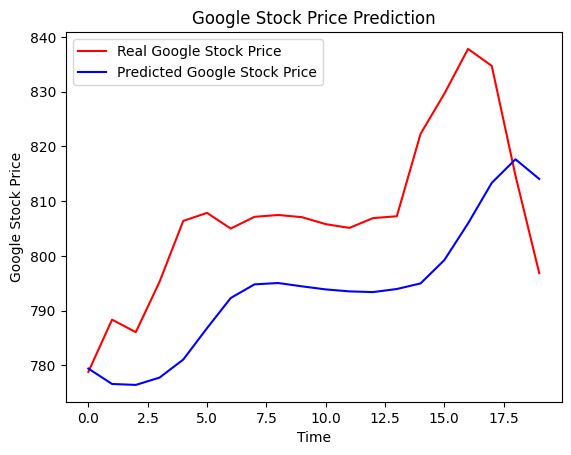

In [6]:
# Visualize results
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()